### SVM (Support Vector Machine)

## Nonlinearly separable data  (SVM with Gaussian RBF Kernel)

The heart disease prediction dataset is an example of nonlinearly separable data because the data points cannot be separated by a linear decision boundary. In other words, it is not possible to draw a straight line that can completely separate the two classes. The SVM with a linear kernel may not be able to correctly classify the data points in this case.

To overcome this limitation, we can use a non-linear kernel, such as the Gaussian RBF kernel. The RBF kernel can handle non-linearly separable data by mapping the input features into a higher-dimensional space, where it is possible to find a hyperplane that can separate the classes. The Gaussian RBF kernel is a popular choice for SVMs because it is flexible and can capture complex patterns in the data.

Using the Gaussian RBF kernel, the SVM can construct a non-linear decision boundary that can accurately classify the heart disease prediction dataset. This allows for a more accurate prediction of the presence or absence of heart disease based on the input features.

In [75]:
#Import relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#Import Support Vector Classifier from library sklearn
from sklearn.svm import SVC
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix,  classification_report

In [66]:
# Column 1: age in years
# Column 2: 1 = male, 0 = female
# Column 3: 1 = typical angina, 2 = atypical angina, 3 = non-anginal pain, 4 = asymptomatic
# Column 4: resting blood pressure in mmHg
# Column 5: in mg/dl
# Column 6: 1 means > 120 mg/dl, 0 means <= 120 mg/dl
# Column 7: resting electrocardiographic, 0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria
# Column 8: max heart rate achieved
# Column 9: 1 = yes, 2 = no
# Column 10: ST depression induced by exercise relative to rest
# Column 11: slope of the peak exercise ST segment, 1 = upsloping, 2 = flat, 3 = downsloping
# Column 12: number of major vessels (0-3) colored by flourosopy
# Column 13: 3 = normal, 6 = fixed defect, 7 = reversable defect
# Column 14: >=1 means heart disease, 0 = no heart disease

myNames = ["age", # column 1
        "sex", # col 2
        "chestPainType", # col 3
        "restingBP", # col 4
        "serumCholesterol", # col 5
        "fastingBloodSugar", # col 6
        "restingEcg", # col 7
        "maxHeartRate", # col 8
        "exerciseInducedAngina", # col 9
        "stDepression", # col 10
        "stSlope", # col 11
        "majorVessels", # col 12
        "thalassemia", # col 13
        "diagnosis"] # col 14
assert len(myNames) == 14
data=pd.read_csv("data/processed.cleveland.data", sep=',', names=myNames, na_values=["?", '?'])
data = data.dropna() # Drop rows with missing data

# Convert all columns to float
for name in myNames:
    data[name] = pd.to_numeric(data[name],errors = 'coerce')

X = data.values[:, :-1]
y = data.values[:, -1:]
y = np.clip(y, a_min=0, a_max=1) # Clip values in the array to be between 0 and 1, both inclusive

m = data.shape[0] # num examples
n = data.shape[1] - 1 # num features

print(m)
print(n)

297
13


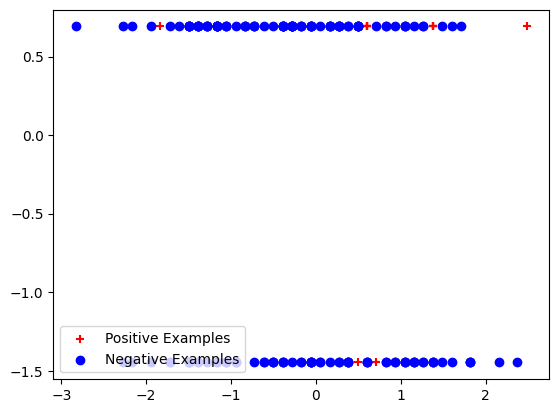

In [72]:
#PLot the data as in Fig.1 
# Weird output -> don't know the reason yet
pos2 = y==1
neg2 = y==0

plt.scatter(X[pos2[:,0],0],X[pos2[:,0],1],c="r",marker="+")
plt.scatter(X[neg2[:,0],0],X[neg2[:,0],1],c="b",marker="o")
plt.legend(["Positive Examples", "Negative Examples"], loc ="lower left") 


In [68]:
# Normalize the data
# The purpose of normalization is to scale the input features so that they have similar ranges and magnitudes. 
# This can help improve the accuracy and speed of the learning algorithm.
mean = np.mean(X, axis=0)
std = np.std(X, axis=0)
X = (X - mean) / std

In [78]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

### Gaussian SVM training

Choose *rbf* (Radial Basis Function) kernel, which corresponds to Gaussian kernel. 

**gamma** parameter is the inverse of the standard deviation of the RBF kernel (gamma = $1/\sigma$). 
**gamma** is used as a similarity measure between two points. 

Small gamma value defines a Gaussian function with a large variance => two points are considered similar even if they are relatively far away from each other. 

Large gamma value defines a Gaussian function with a small variance => two points are considered similar if they are very close to each other.

In [79]:
# Declare the classifier
classifier = SVC(kernel='rbf', gamma=100, C=1)

# Train the classifier on training data
classifier.fit(X_train, np.ravel(y_train))

# Get the classifier accuracy on training data
train_accuracy = classifier.score(X_train, y_train)
print(f"Training accuracy: {train_accuracy:.2f}")

# Get the classifier accuracy on validation data
val_accuracy = classifier.score(X_val, y_val)
print(f"Validation accuracy: {val_accuracy:.2f}")

# Train and evaluate the classifier using k-fold cross-validation on training data
scores = cross_val_score(classifier, X_train, np.ravel(y_train), cv=5)

# Print the average score and the standard deviation of the scores
print(f"Cross-validation accuracy on training data: {scores.mean():.2f} (+/- {scores.std():.2f})")

# Predict the class labels for the test set
y_pred = classifier.predict(X_val)

# Compute the confusion matrix
cm = confusion_matrix(y_val, y_pred)
tn, fp, fn, tp = cm.ravel()

# Print confusion matrix with labels
print("Confusion Matrix:")
print("                Predicted No    Predicted Yes")
print(f"Actual No        {tn}               {fp}")
print(f"Actual Yes       {fn}               {tp}")

# Generate classification report
cr = classification_report(y_val, y_pred)

print("\nClassification Report:")
print(cr)


Training accuracy: 1.00
Validation accuracy: 0.60
Cross-validation accuracy on training data: 0.52 (+/- 0.01)
Confusion Matrix:
                Predicted No    Predicted Yes
Actual No        36               0
Actual Yes       24               0

Classification Report:
              precision    recall  f1-score   support

         0.0       0.60      1.00      0.75        36
         1.0       0.00      0.00      0.00        24

    accuracy                           0.60        60
   macro avg       0.30      0.50      0.37        60
weighted avg       0.36      0.60      0.45        60



/home/nudibranch/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/nudibranch/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/nudibranch/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [80]:
# Repeat SVM training for C = 100

#Declare the classifier 
classifier = SVC(kernel='rbf',gamma =10, C=100)

#Train the classifier 
#sklearn works with rank one arrays, 
classifier.fit(X,np.ravel(y))

#Get the classifier accuracy 
print(classifier.score(X,y))
# Get the classifier accuracy
print(f"Classifier accuracy: {classifier.score(X, y)}")

#Train and evaluate the classifier using k-fold cross-validation
scores = cross_val_score(classifier, X, np.ravel(y), cv=5)

#Print the average score and the standard deviation of the scores
print(f"Cross-validation accuracy: {scores.mean():.2f} (+/- {scores.std():.2f})")

# Print the average score and the standard deviation of the scores
print(f"Cross-validation accuracy: {scores.mean():.2f} (+/- {scores.std():.2f})")

# Predict the class labels for the test set
y_pred = classifier.predict(X)

# Compute the confusion matrix
cm = confusion_matrix(y, y_pred)
tn, fp, fn, tp = cm.ravel()

# Print confusion matrix with labels
print("Confusion Matrix:")
print("                Predicted No    Predicted Yes")
print("Actual No        ", tn, "            ", fp)
print("Actual Yes       ", fn, "             ", tp)

# Generate classification report
cr = classification_report(y, y_pred)

print("\nClassification Report:")
print(cr)

1.0
Classifier accuracy: 1.0
Cross-validation accuracy: 0.54 (+/- 0.00)
Cross-validation accuracy: 0.54 (+/- 0.00)
Confusion Matrix:
                Predicted No    Predicted Yes
Actual No         160              0
Actual Yes        0               137

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       160
         1.0       1.00      1.00      1.00       137

    accuracy                           1.00       297
   macro avg       1.00      1.00      1.00       297
weighted avg       1.00      1.00      1.00       297



### Hyperparameter tuning

In [82]:
def dataset3Params(X, y, Xval, yval,vals):
    """
    dataset3Params returns the optimal C and gamma(1/sigma) based on a cross-validation set.
    """
    acc = 0
    best_C=0
    best_gamma=0
    for i in vals:
        C= i
        for j in vals:
            gamma = 1/j
            classifier = SVC(C=C,gamma=gamma)
            classifier.fit(X,y)
            prediction = classifier.predict(Xval)
            score = classifier.score(Xval,yval)
            if score>acc:
                acc =score
                best_C =C
                best_gamma=gamma
    return best_C, best_gamma

In [83]:
#What are the best C and sigma ?
vals = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]

best_C, best_gamma = dataset3Params(X, y.ravel(), X_val, y_val.ravel(),vals)
print(best_C)
print(best_gamma)

1
100.0
